## pmdarima

In [5]:
import pmdarima as pm
import pandas as pd
import numpy as np

In [6]:
df_h1 = pd.read_csv('../data/df_h1.csv', )
df_h1

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT,split
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000,train
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001,train
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001,train
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001,train
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000,train
...,...,...,...,...,...,...,...,...,...
17415,2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000,test
17416,2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000,test
17417,2018-06-26 17:00:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000,test
17418,2018-06-26 18:00:00,9.243,3.818,5.472,2.097,3.655,1.432,9.778000,test


In [7]:
import matplotlib.pyplot as plt

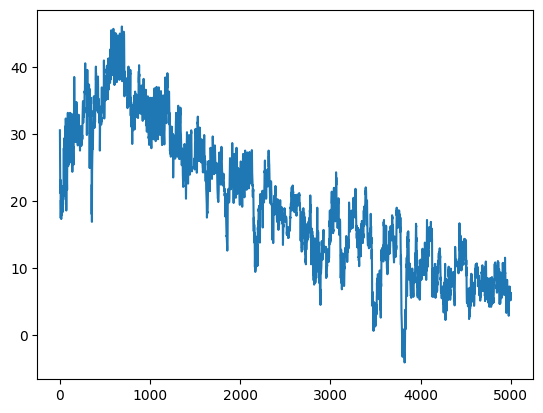

In [8]:
X = df_h1.OT.iloc[:5000]

plt.plot(X)

In [9]:
df_h1.isna().sum()

date     0
HUFL     0
HULL     0
MUFL     0
MULL     0
LUFL     0
LULL     0
OT       0
split    0
dtype: int64

In [10]:
y_train = df_h1[df_h1.split == 'train'].OT.to_numpy()
y_test = df_h1[df_h1.split == 'test'].OT.to_numpy()
X_train = df_h1[df_h1.split == 'train'].iloc[:, 1:7].to_numpy()
X_test = df_h1[df_h1.split == 'test'].iloc[:, 1:7].to_numpy()

In [36]:
model = pm.auto_arima(y_train, seasonal=False, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26015.110, Time=3.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26027.013, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26027.417, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26027.466, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26025.029, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26027.465, Time=1.74 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26028.014, Time=1.79 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=26008.204, Time=6.71 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26018.230, Time=2.10 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=25621.270, Time=9.86 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=25838.564, Time=7.56 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=25842.552, Time=11.13 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=25825.318, Time=9.70 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=26013.617, Time=5.69 sec
 ARIMA(5,1,1)(0,0,

In [41]:
model = pm.auto_arima(y_train, X=X_train, seasonal=False, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=25973.099, Time=10.81 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25989.072, Time=2.37 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25986.675, Time=2.85 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25986.760, Time=3.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25987.086, Time=1.85 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=25988.716, Time=8.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=25989.120, Time=6.85 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=25966.976, Time=11.73 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=25979.527, Time=8.15 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=25750.074, Time=16.33 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=25815.448, Time=14.55 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=25810.375, Time=16.40 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=25864.332, Time=17.00 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=25973.945, Time=14.52 sec
 ARIMA(5,1,1

In [44]:
forecasts = model.predict(n_periods=len(y_test), X=X_test)

In [45]:
forecasts

array([18.86867495, 18.99915799, 19.02453094, ..., 18.7158599 ,
       18.5298011 , 18.48175977])

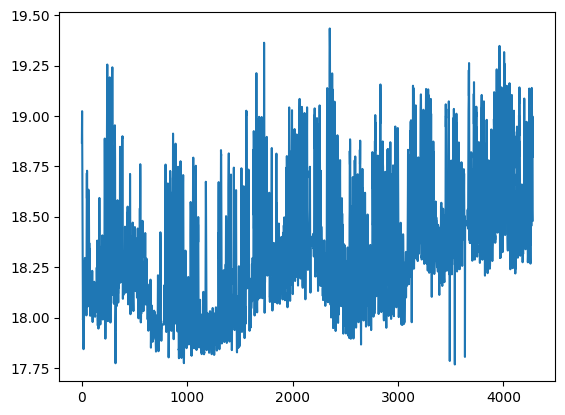

In [46]:
plt.plot(forecasts)

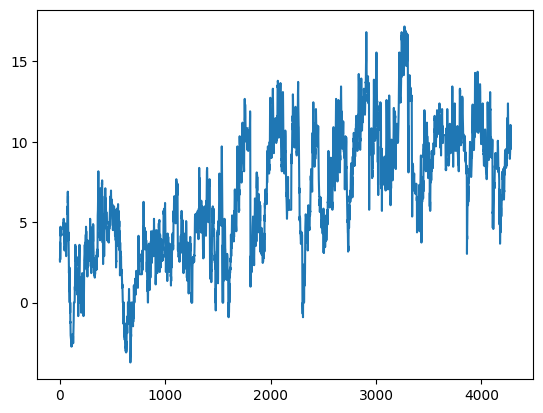

In [47]:
plt.plot(y_test)

## statsforecast

In [70]:
from statsforecast import StatsForecast

In [71]:
y_train = df_h1[df_h1.split == 'train'][['date','OT']]
y_train['unique_id'] = 'ETTh1'
y_train.rename(columns={'unique_id': 'unique_id', 'date': 'ds', 'OT': 'y'}, inplace=True)
y_train = y_train[['unique_id', 'ds', 'y']]
y_train

,unique_id,ds,y
0,ETTh1,2016-07-01 00:00:00,30.531000
1,ETTh1,2016-07-01 01:00:00,27.787001
2,ETTh1,2016-07-01 02:00:00,27.787001
3,ETTh1,2016-07-01 03:00:00,25.044001
4,ETTh1,2016-07-01 04:00:00,21.948000
...,...,...,...
8715,ETTh1,2017-06-29 03:00:00,18.642000
8716,ETTh1,2017-06-29 04:00:00,19.134001
8717,ETTh1,2017-06-29 05:00:00,19.837999
8718,ETTh1,2017-06-29 06:00:00,18.712000


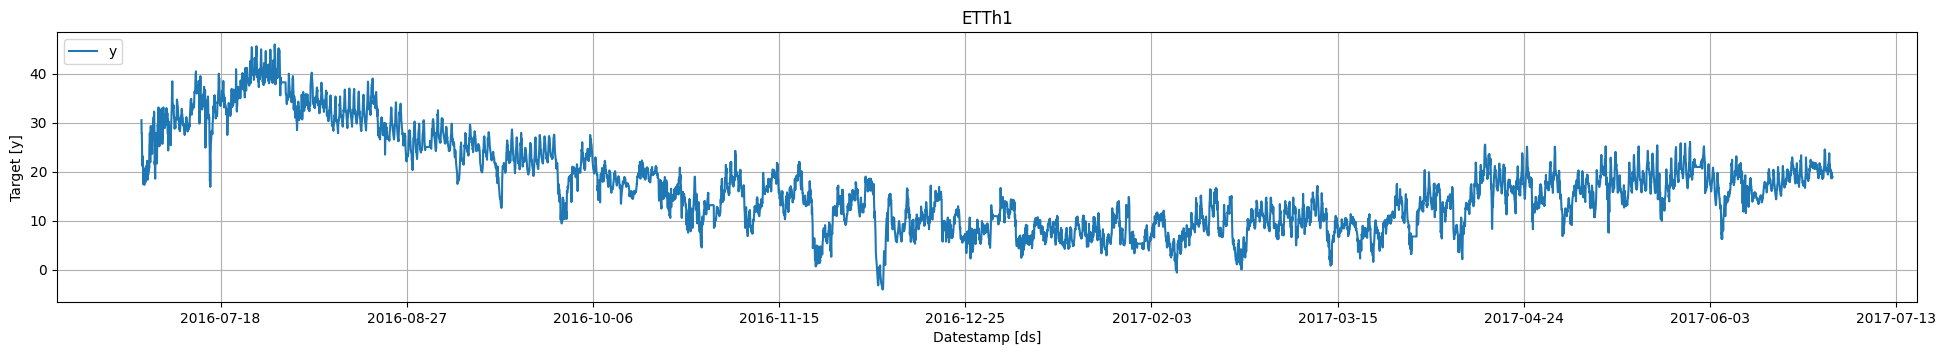

In [72]:
StatsForecast.plot(y_train, engine='matplotlib')

In [73]:
from statsforecast.models import (
    AutoARIMA,
    HoltWinters,
    DynamicOptimizedTheta as DOT)


In [74]:
models = [
    AutoARIMA(season_length=24),
    HoltWinters(),
    DOT(season_length=24)]


In [78]:
sf = StatsForecast(
    df=y_train[-1000:-48], 
    models=models,
    freq='H', 
    n_jobs=-1,
    fallback_model = AutoARIMA(season_length=24))


In [79]:
forecasts_df = sf.forecast(h=48)

forecasts_df.head()


,ds,AutoARIMA,HoltWinters,DynamicOptimizedTheta
unique_id,,,,
ETTh1,2017-06-27 08:00:00,18.767349,18.767349,19.331453
ETTh1,2017-06-27 09:00:00,18.645386,18.645386,19.475777
ETTh1,2017-06-27 10:00:00,18.740704,18.740704,19.686815
ETTh1,2017-06-27 11:00:00,18.852764,18.852764,20.145094
ETTh1,2017-06-27 12:00:00,18.823637,18.823637,20.614233


c:\Users\sonng\anaconda3\envs\tsff_env\lib\site-packages\statsforecast\core.py:1514: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["unique_id"] = df["unique_id"].astype(uid_dtype)


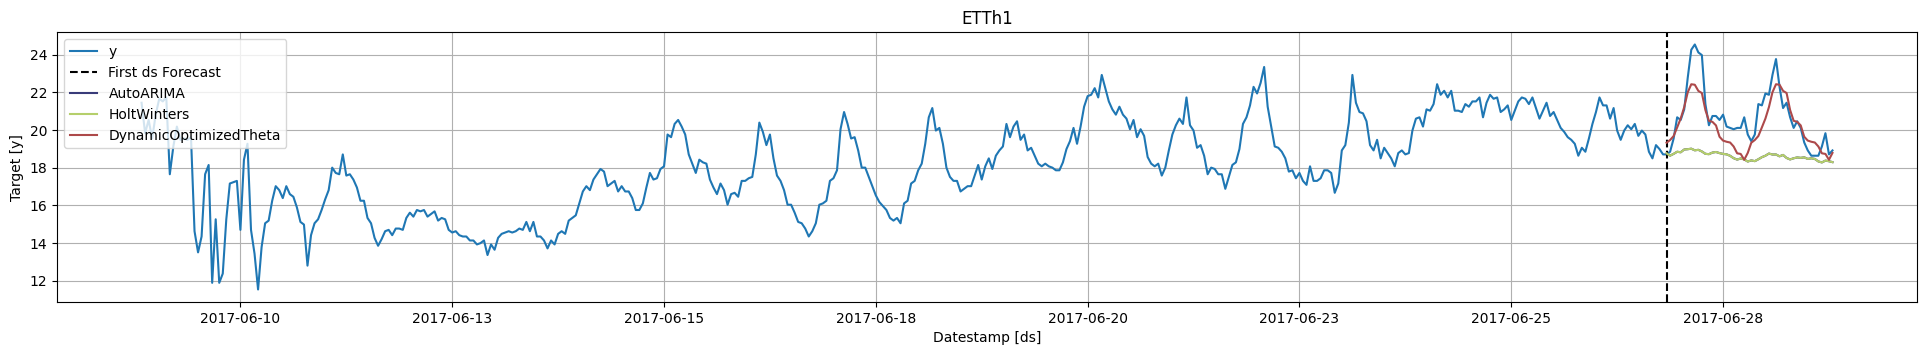

In [80]:
sf.plot(y_train[-480:],forecasts_df, engine='matplotlib')

## Prophet

In [4]:
from prophet import Prophet

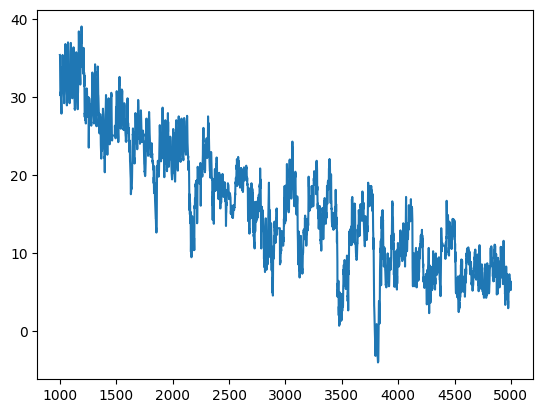

In [25]:
plt.plot(df_h1[df_h1.split == 'train'][1000:5000].OT)

In [35]:
data = df_h1[df_h1.split == 'train'].iloc[1000:5000, 0:8]
data

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
1000,2016-08-11 16:00:00,12.458,5.492,8.386,3.767,4.173,1.279,35.384998
1001,2016-08-11 17:00:00,11.454,5.023,7.285,3.020,4.264,1.462,35.313999
1002,2016-08-11 18:00:00,6.631,2.210,2.487,0.675,4.112,1.371,33.485001
1003,2016-08-11 19:00:00,10.248,3.617,6.183,2.061,4.112,1.097,32.077999
1004,2016-08-11 20:00:00,17.482,4.086,11.300,2.061,6.061,1.432,30.742001
...,...,...,...,...,...,...,...,...
4995,2017-01-25 03:00:00,6.564,-2.277,4.975,-3.092,1.614,0.457,5.979000
4996,2017-01-25 04:00:00,5.894,-2.277,4.264,-3.056,1.584,0.457,5.909000
4997,2017-01-25 05:00:00,6.631,-2.277,4.868,-3.092,1.736,0.457,5.768000
4998,2017-01-25 06:00:00,7.301,-2.210,5.295,-3.020,1.980,0.457,5.206000


In [40]:
data['date'] = pd.to_datetime(data['date'])

In [41]:
data.dtypes

date    datetime64[ns]
HUFL           float64
HULL           float64
MUFL           float64
MULL           float64
LUFL           float64
LULL           float64
OT             float64
dtype: object

In [52]:
data.rename(columns={'date':'ds', 'OT':'y'}, inplace=True)
data

,ds,HUFL,HULL,MUFL,MULL,LUFL,LULL,y
1000,2016-08-11 16:00:00,12.458,5.492,8.386,3.767,4.173,1.279,35.384998
1001,2016-08-11 17:00:00,11.454,5.023,7.285,3.020,4.264,1.462,35.313999
1002,2016-08-11 18:00:00,6.631,2.210,2.487,0.675,4.112,1.371,33.485001
1003,2016-08-11 19:00:00,10.248,3.617,6.183,2.061,4.112,1.097,32.077999
1004,2016-08-11 20:00:00,17.482,4.086,11.300,2.061,6.061,1.432,30.742001
...,...,...,...,...,...,...,...,...
4995,2017-01-25 03:00:00,6.564,-2.277,4.975,-3.092,1.614,0.457,5.979000
4996,2017-01-25 04:00:00,5.894,-2.277,4.264,-3.056,1.584,0.457,5.909000
4997,2017-01-25 05:00:00,6.631,-2.277,4.868,-3.092,1.736,0.457,5.768000
4998,2017-01-25 06:00:00,7.301,-2.210,5.295,-3.020,1.980,0.457,5.206000


In [53]:
train = data.iloc[:3500].reset_index(drop=True)
train

,ds,HUFL,HULL,MUFL,MULL,LUFL,LULL,y
0,2016-08-11 16:00:00,12.458,5.492,8.386,3.767,4.173,1.279,35.384998
1,2016-08-11 17:00:00,11.454,5.023,7.285,3.020,4.264,1.462,35.313999
2,2016-08-11 18:00:00,6.631,2.210,2.487,0.675,4.112,1.371,33.485001
3,2016-08-11 19:00:00,10.248,3.617,6.183,2.061,4.112,1.097,32.077999
4,2016-08-11 20:00:00,17.482,4.086,11.300,2.061,6.061,1.432,30.742001
...,...,...,...,...,...,...,...,...
3495,2017-01-04 07:00:00,12.391,0.871,9.204,-0.782,2.741,0.853,12.451000
3496,2017-01-04 08:00:00,11.186,1.875,8.422,-0.391,3.198,0.975,12.240000
3497,2017-01-04 09:00:00,8.573,0.402,5.543,-1.421,2.498,0.914,12.522000
3498,2017-01-04 10:00:00,9.042,0.000,6.716,-1.244,2.589,1.279,12.100000


In [54]:
test = data.iloc[3500:4000].reset_index(drop=True)
test

,ds,HUFL,HULL,MUFL,MULL,LUFL,LULL,y
0,2017-01-04 12:00:00,7.234,-0.871,4.726,-2.097,2.467,0.701,12.311
1,2017-01-04 13:00:00,7.368,-0.603,5.153,-1.848,2.345,0.822,12.170
2,2017-01-04 14:00:00,7.502,-0.134,5.366,-1.919,2.528,0.975,13.788
3,2017-01-04 15:00:00,8.105,0.067,5.330,-1.670,2.345,0.853,10.622
4,2017-01-04 16:00:00,8.172,-0.871,5.437,-2.203,2.650,0.975,10.482
...,...,...,...,...,...,...,...,...
495,2017-01-25 03:00:00,6.564,-2.277,4.975,-3.092,1.614,0.457,5.979
496,2017-01-25 04:00:00,5.894,-2.277,4.264,-3.056,1.584,0.457,5.909
497,2017-01-25 05:00:00,6.631,-2.277,4.868,-3.092,1.736,0.457,5.768
498,2017-01-25 06:00:00,7.301,-2.210,5.295,-3.020,1.980,0.457,5.206


In [55]:
model = Prophet()
model.add_regressor('HUFL', standardize=False)
model.add_regressor('HULL', standardize=False)
model.add_regressor('MUFL', standardize=False)
model.add_regressor('MULL', standardize=False)
model.add_regressor('LUFL', standardize=False)
model.add_regressor('LULL', standardize=False)

In [56]:
model.fit(train)

12:11:34 - cmdstanpy - INFO - Chain [1] start processing
12:11:36 - cmdstanpy - INFO - Chain [1] done processing


In [61]:
test.iloc[:, 0:7]

,ds,HUFL,HULL,MUFL,MULL,LUFL,LULL
0,2017-01-04 12:00:00,7.234,-0.871,4.726,-2.097,2.467,0.701
1,2017-01-04 13:00:00,7.368,-0.603,5.153,-1.848,2.345,0.822
2,2017-01-04 14:00:00,7.502,-0.134,5.366,-1.919,2.528,0.975
3,2017-01-04 15:00:00,8.105,0.067,5.330,-1.670,2.345,0.853
4,2017-01-04 16:00:00,8.172,-0.871,5.437,-2.203,2.650,0.975
...,...,...,...,...,...,...,...
495,2017-01-25 03:00:00,6.564,-2.277,4.975,-3.092,1.614,0.457
496,2017-01-25 04:00:00,5.894,-2.277,4.264,-3.056,1.584,0.457
497,2017-01-25 05:00:00,6.631,-2.277,4.868,-3.092,1.736,0.457
498,2017-01-25 06:00:00,7.301,-2.210,5.295,-3.020,1.980,0.457


In [62]:
model.predict(test.iloc[:, 0:7])

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,HUFL,HUFL_lower,HUFL_upper,HULL,HULL_lower,HULL_upper,LUFL,LUFL_lower,LUFL_upper,LULL,LULL_lower,LULL_upper,MUFL,MUFL_lower,MUFL_upper,MULL,MULL_lower,MULL_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-04 12:00:00,6.044312,4.053663,12.486936,6.044312,6.044312,2.239319,2.239319,2.239319,-0.289740,-0.289740,-0.289740,0.257176,0.257176,0.257176,-0.415220,-0.415220,-0.415220,0.319475,0.319475,0.319475,-0.108321,-0.108321,-0.108321,2.117515,2.117515,2.117515,1.386499,1.386499,1.386499,2.002689,2.002689,2.002689,-1.271673,-1.271673,-1.271673,0.0,0.0,0.0,8.161827
1,2017-01-04 13:00:00,6.043462,4.578398,12.935353,6.043462,6.043462,2.280799,2.280799,2.280799,-0.200589,-0.200589,-0.200589,0.244458,0.244458,0.244458,-0.486891,-0.486891,-0.486891,0.348340,0.348340,0.348340,-0.095459,-0.095459,-0.095459,2.763538,2.763538,2.763538,1.914157,1.914157,1.914157,2.090657,2.090657,2.090657,-1.241277,-1.241277,-1.241277,0.0,0.0,0.0,8.807000
2,2017-01-04 14:00:00,6.042612,5.534402,13.567200,6.042612,6.042612,2.322280,2.322280,2.322280,-0.044575,-0.044575,-0.044575,0.263535,0.263535,0.263535,-0.577517,-0.577517,-0.577517,0.362739,0.362739,0.362739,-0.099127,-0.099127,-0.099127,3.381643,3.381643,3.381643,2.362598,2.362598,2.362598,2.227334,2.227334,2.227334,-1.208289,-1.208289,-1.208289,0.0,0.0,0.0,9.424254
3,2017-01-04 15:00:00,6.041762,5.730561,13.878678,6.041762,6.041762,2.508941,2.508941,2.508941,0.022288,0.022288,0.022288,0.244458,0.244458,0.244458,-0.505253,-0.505253,-0.505253,0.360305,0.360305,0.360305,-0.086265,-0.086265,-0.086265,3.914975,3.914975,3.914975,2.543515,2.543515,2.543515,2.544474,2.544474,2.544474,-1.173014,-1.173014,-1.173014,0.0,0.0,0.0,9.956737
4,2017-01-04 16:00:00,6.040912,5.326261,13.543457,6.040912,6.040912,2.529681,2.529681,2.529681,-0.289740,-0.289740,-0.289740,0.276253,0.276253,0.276253,-0.577517,-0.577517,-0.577517,0.367538,0.367538,0.367538,-0.113797,-0.113797,-0.113797,3.433994,3.433994,3.433994,2.377338,2.377338,2.377338,2.192419,2.192419,2.192419,-1.135762,-1.135762,-1.135762,0.0,0.0,0.0,9.474907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2017-01-25 03:00:00,5.623621,-0.871365,7.627226,4.377939,6.792719,2.031917,2.031917,2.031917,-0.757448,-0.757448,-0.757448,0.168254,0.168254,0.168254,-0.270693,-0.270693,-0.270693,0.336307,0.336307,0.336307,-0.159719,-0.159719,-0.159719,-2.011050,-2.011050,-2.011050,-1.973968,-1.973968,-1.973968,1.348619,1.348619,1.348619,-1.385701,-1.385701,-1.385701,0.0,0.0,0.0,3.612571
496,2017-01-25 04:00:00,5.622771,-1.147150,7.431287,4.373001,6.795501,1.824516,1.824516,1.824516,-0.757448,-0.757448,-0.757448,0.165126,0.165126,0.165126,-0.270693,-0.270693,-0.270693,0.288244,0.288244,0.288244,-0.157859,-0.157859,-0.157859,-2.344956,-2.344956,-2.344956,-2.047085,-2.047085,-2.047085,1.091886,1.091886,1.091886,-1.389757,-1.389757,-1.389757,0.0,0.0,0.0,3.277815
497,2017-01-25 05:00:00,5.621921,-1.251831,7.651994,4.368261,6.797240,2.052658,2.052658,2.052658,-0.757448,-0.757448,-0.757448,0.180972,0.180972,0.180972,-0.270693,-0.270693,-0.270693,0.329074,0.329074,0.329074,-0.159719,-0.159719,-0.159719,-2.289903,-2.289903,-2.289903,-2.275506,-2.275506,-2.275506,1.374844,1.374844,1.374844,-1.389241,-1.389241,-1.389241,0.0,0.0,0.0,3.332018
498,2017-01-25 06:00:00,5.621071,-0.793264,8.127593,4.363521,6.798979,2.260059,2.260059,2.260059,-0.735161,-0.735161,-0.735161,0.206408,0.206408,0.206408,-0.270693,-0.270693,-0.270693,0.357939,0.357939,0.357939,-0.155999,-0.155999,-0.155999,-2.089075,-2.089075,-2.089075,-2.367344,-2.367344,-2.367344,1.662554,1.662554,1.662554,-1.384284,-

In [67]:
future = model.make_future_dataframe(periods=500)
forecast = model.predict(future)

ValueError: Regressor 'HUFL' missing from dataframe